In [8]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
x = pd.DataFrame(housing['data'], columns=housing.feature_names)
y = housing['target']

In [6]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

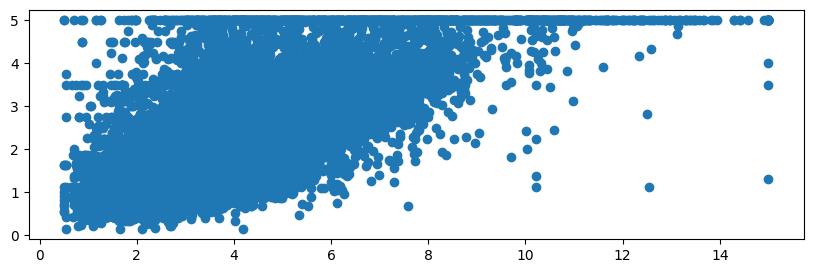

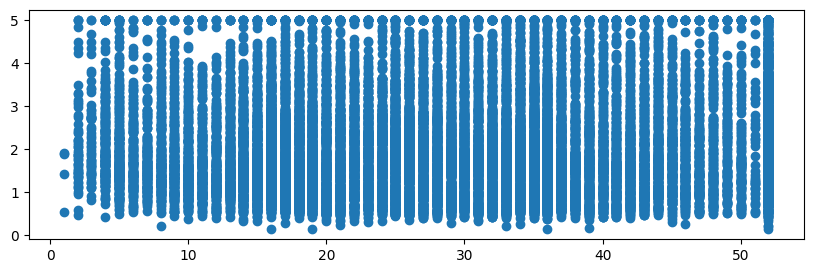

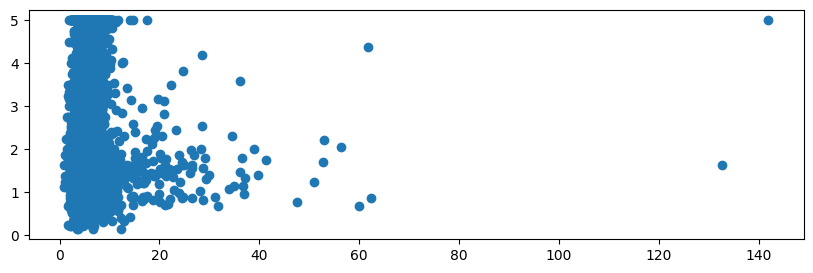

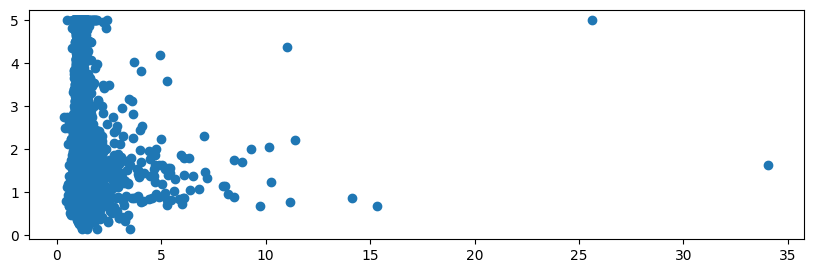

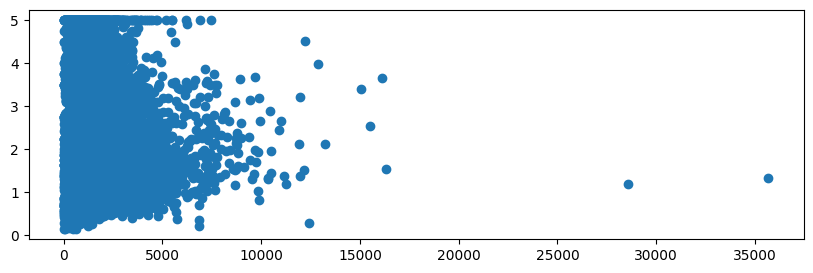

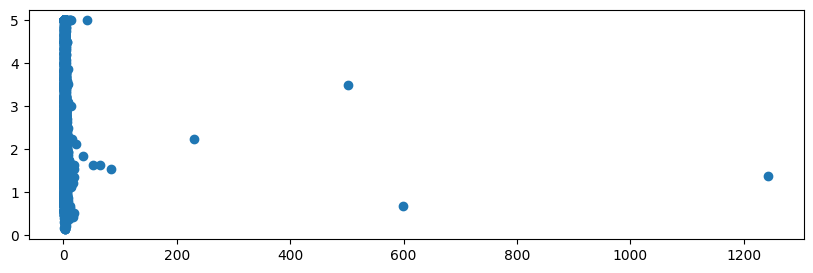

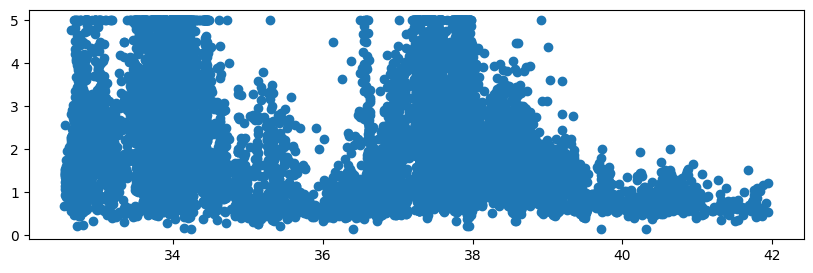

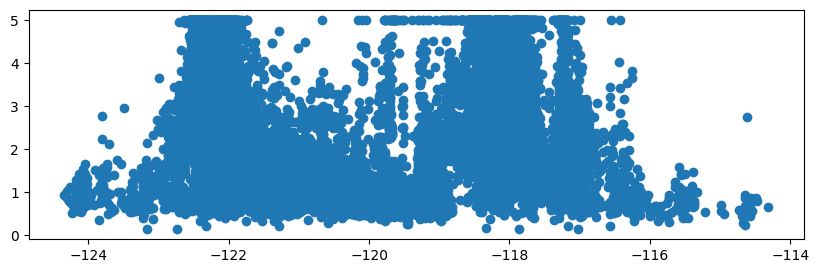

In [14]:
i = 1
for col in x.columns:
    plt.figure(figsize=(10, 28))
    plt.subplot(8, 1, i)
    i = i + 1
    plt.scatter(x[col], y)
    plt.show()

In [15]:
corr = x.corr()

In [16]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

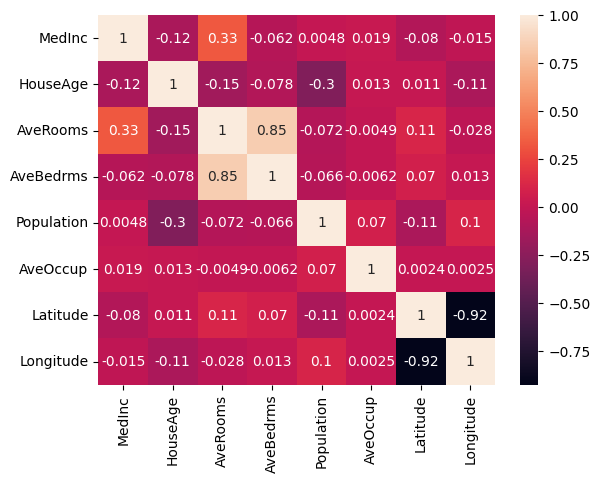

In [17]:
sns.heatmap(corr, annot=True)

In [18]:
x.shape

(20640, 8)

In [22]:
x_train = x[:18000]
x_test = x[18000:]
y_train = y[:18000]
y_test = y[18000:]

In [24]:
print(y_train.shape)

(18000,)


In [25]:
x_train = np.insert(x_train, 0, 1 , axis = 1)

In [27]:
# beta[0] # bias
# beta[1:]

def fit(x_train, y_train):
    beta = 0
    beta = np.linalg.inv(np.dot(x_train.T, x_train)).dot(x_train.T).dot(y_train)
    return beta[0], beta[1:]

In [34]:
bias, coef = fit(x_train, y_train) 

In [35]:
print(x_train.shape, y_train.shape)

(18000, 9) (18000,)


In [44]:
bias

-36.46568650809779

In [42]:
coef.shape

(8,)

In [58]:
def predict(x_test):
    y_pred = np.dot(x_test, coef) + bias
    return y_pred

In [56]:
y_pred = np.dot(x_test, coef) + bias

In [57]:
y_pred

array([2.30109148, 3.11365445, 3.10884342, ..., 0.14573691, 0.29587125,
       0.49615147])

In [59]:
y_pred = predict(x_test)

In [60]:
y_pred[0], y_test[0]

(2.3010914771601705, 2.691)

In [61]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7245055826382709


In [63]:
from sklearn.datasets import load_iris

In [64]:
iris = load_iris()

In [ ]:
x = pd.